In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
from scipy import stats


# Librarires for Visualization

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# For data manipualtiona and model building

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
# Reading the data
con_data = pd.read_csv('Concrete_Data.csv')
con_data.head()

Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse_Aggregate  Fine_Aggregate  Age_in_days  \
0            1040.0           676.0           28   
1            1055.0           676.0           28   
2             932.0           594.0          270   
3             932.0           594.0          365   
4             978.4           825.5          360   

   Concrete_compressive_strength  
0                          79.99  
1                          61.89  
2                          40.27  
3                          41.05  
4                          44.30

In [3]:
# checking the data types
con_data.dtypes

Cement                           float64
Blast_Furnace_Slag               float64
Fly_Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse_Aggregate                 float64
Fine_Aggregate                   float64
Age_in_days                        int64
Concrete_compressive_strength    float64
dtype: object

In [4]:
# Checking for the null values
con_data.isnull().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age_in_days                      0
Concrete_compressive_strength    0
dtype: int64

In [5]:
# Checking for the duplicated rows
con_data.duplicated().sum()

25

In [6]:
# Dropping the duplicated rows
con_data.drop_duplicates(inplace = True)

In [7]:
# Checking for the duplicated rows
con_data.duplicated().sum()

0

In [8]:
con_data.shape

(1005, 9)

In [9]:
con_data.head()

Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse_Aggregate  Fine_Aggregate  Age_in_days  \
0            1040.0           676.0           28   
1            1055.0           676.0           28   
2             932.0           594.0          270   
3             932.0           594.0          365   
4             978.4           825.5          360   

   Concrete_compressive_strength  
0                          79.99  
1                          61.89  
2                          40.27  
3                          41.05  
4                          44.30

In [10]:
fig = px.box(con_data)
fig.show()

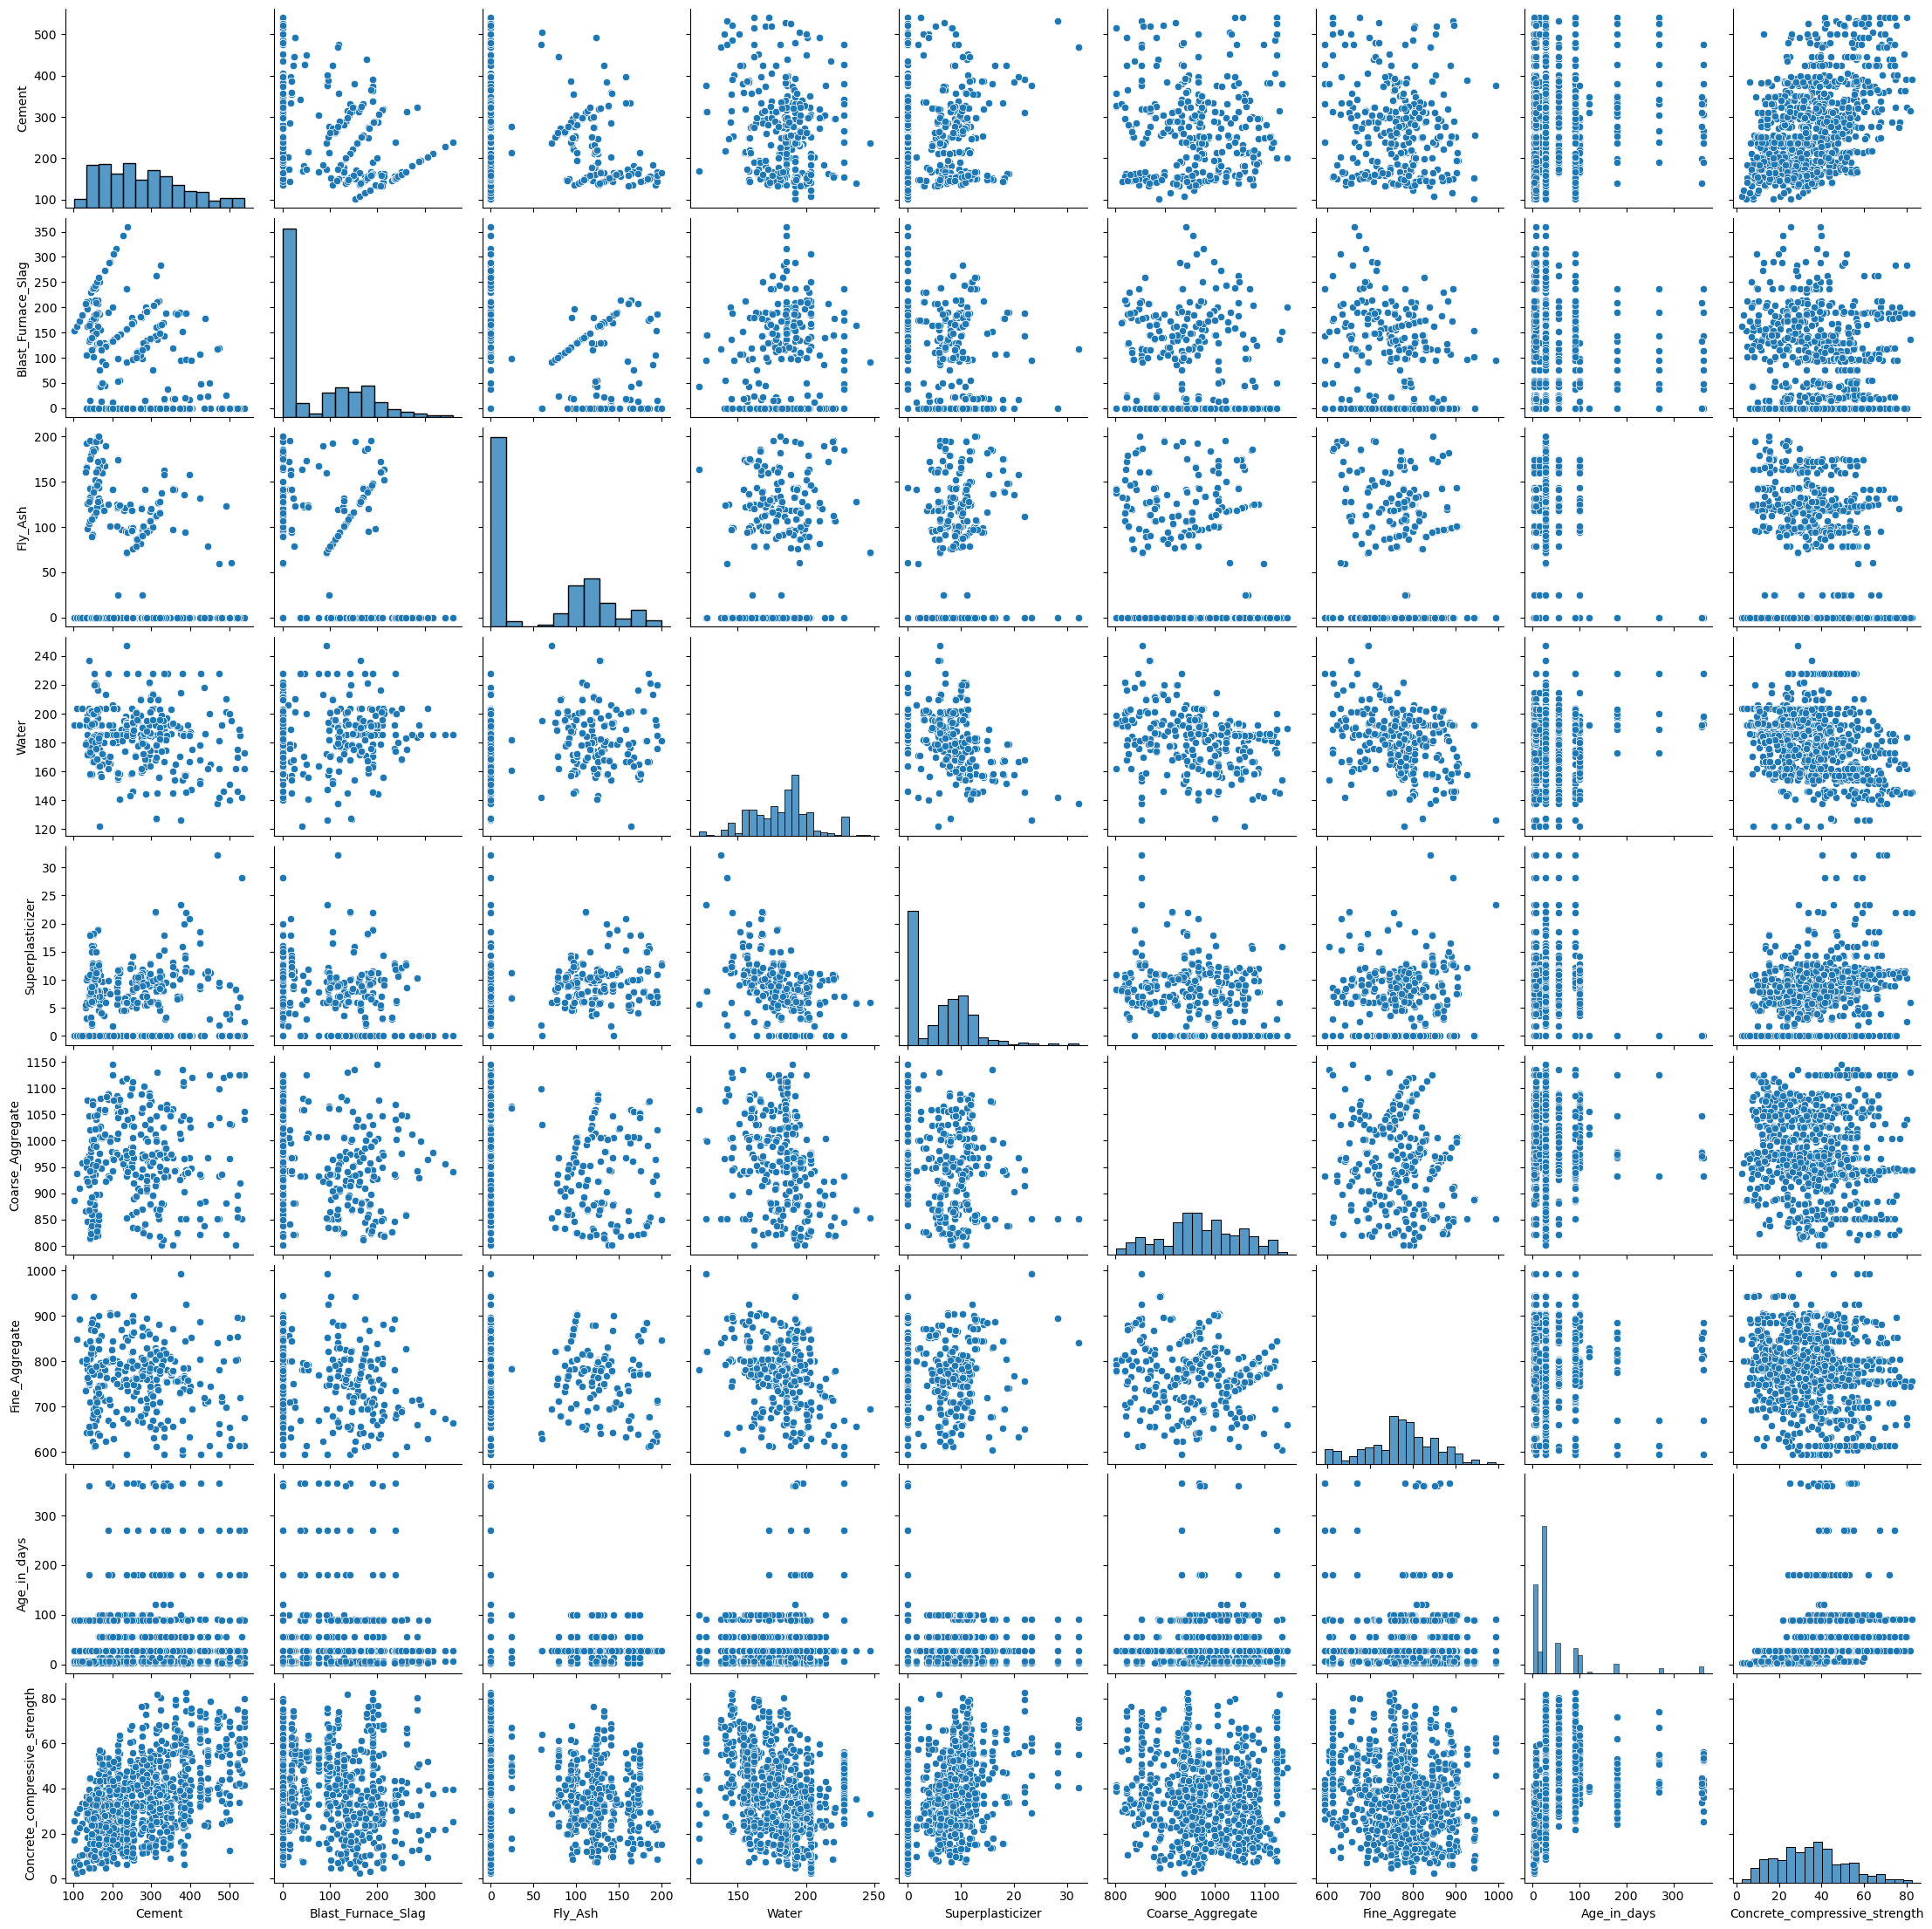

In [11]:
sns.pairplot(con_data)
plt.show()

In [12]:
con_data.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age_in_days',
       'Concrete_compressive_strength'],
      dtype='object')

In [13]:
# Splitting into Independent and dependent variable
X = con_data.drop(['Concrete_compressive_strength'], axis = 1)
y = con_data['Concrete_compressive_strength']

In [14]:
# Splitting into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [15]:
print('Y Target Size:', len(y_train))
print('X Train Size:', len(X_train))
print('X Test  Size:', len(X_test))
print('Y Target Size:', len(y_test))

Y Target Size: 804
X Train Size: 804
X Test  Size: 201
Y Target Size: 201


In [16]:
# Adding the constant term to the Independent variable
X_train = sm.add_constant(X_train)
X_train.head()

X_test = sm.add_constant(X_test)
X_test.head()

const  Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
990    1.0   151.8               178.1    138.7  167.5              18.3   
671    1.0   236.0               157.0      0.0  192.0               0.0   
592    1.0   382.5                 0.0      0.0  185.7               0.0   
825    1.0   397.0                 0.0      0.0  185.0               0.0   
304    1.0   277.1                 0.0     97.4  160.6              11.8   

     Coarse_Aggregate  Fine_Aggregate  Age_in_days  
990             944.0           694.6           28  
671             972.6           749.1            7  
592            1047.8           739.3           28  
825            1040.0           734.0           28  
304             973.9           875.6            3

In [17]:
X_train.columns

Index(['const', 'Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water',
       'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate',
       'Age_in_days'],
      dtype='object')

## Training the model with all the inpedenpent variables

In [18]:
model_all = sm.OLS(y_train, X_train[['const', 'Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water',
       'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate',
       'Age_in_days']]).fit()
print(model_all.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete_compressive_strength   R-squared:                       0.595
Model:                                       OLS   Adj. R-squared:                  0.590
Method:                            Least Squares   F-statistic:                     145.7
Date:                           Tue, 04 Apr 2023   Prob (F-statistic):          3.31e-150
Time:                                   15:57:42   Log-Likelihood:                -3026.6
No. Observations:                            804   AIC:                             6071.
Df Residuals:                                795   BIC:                             6113.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

## As we can see that the p-value of the fine_agg and the coarse_agg are higher than 0.05 we will be dropping those variables and will see if there is any change in the R-square value

In [19]:
model_all = sm.OLS(y_train, X_train[['const', 'Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water',
       'Superplasticizer','Age_in_days']]).fit()
print(model_all.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete_compressive_strength   R-squared:                       0.593
Model:                                       OLS   Adj. R-squared:                  0.590
Method:                            Least Squares   F-statistic:                     193.5
Date:                           Tue, 04 Apr 2023   Prob (F-statistic):          7.89e-152
Time:                                   15:57:42   Log-Likelihood:                -3028.2
No. Observations:                            804   AIC:                             6070.
Df Residuals:                                797   BIC:                             6103.
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [20]:
# Checking the Assumptions 

def residual_plots(results):
    import matplotlib.pyplot as plt
    import statsmodels.formula.api as smf
    from statsmodels.nonparametric.smoothers_lowess import lowess
    from scipy import stats
    import statsmodels.api as sm
    
    
    fig, ax = plt.subplots(2,2,figsize=(14,10))
    ########## Residuals vs fitted  ##########
    residuals = results.resid
    fitted = results.fittedvalues
    smoothed = lowess(residuals,fitted)
    top3 = abs(residuals).sort_values(ascending = False)[:3]

    plt.rcParams.update({'font.size': 16})
    plt.rcParams["figure.figsize"] = (8,7)
    
    ax[0,0].scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
    ax[0,0].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[0,0].set_ylabel('Residuals')
    ax[0,0].set_xlabel('Fitted Values')
    ax[0,0].set_title('Residuals vs. Fitted')
    ax[0,0].plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

    for i in top3.index:
        ax[0,0].annotate(i,xy=(fitted[i],residuals[i]))

    #plt.show()
    
    
    ######### Normal qq plot ###########
    sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    sorted_student_residuals.index = results.resid.index
    sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
    df = pd.DataFrame(sorted_student_residuals)
    df.columns = ['sorted_student_residuals']
    df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
    rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
    top3 = rankings[:3]

    #fig, ax = plt.subplots()
    x = df['theoretical_quantiles']
    y = df['sorted_student_residuals']
    ax[0,1].scatter(x,y, edgecolor = 'k',facecolor = 'none')
    ax[0,1].set_title('Normal Q-Q')
    ax[0,1].set_ylabel('Standardized Residuals')
    ax[0,1].set_xlabel('Theoretical Quantiles')
    ax[0,1].plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
    for val in top3.index:
        ax[0,1].annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
    #plt.show()
    
    
    ######### Homoscedasticity ############
    student_residuals = results.get_influence().resid_studentized_internal
    sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
    sqrt_student_residuals.index = results.resid.index
    smoothed = lowess(sqrt_student_residuals,fitted)
    top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

    #fig, ax = plt.subplots()
    ax[1,0].scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none')
    ax[1,0].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[1,0].set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
    ax[1,0].set_xlabel('Fitted Values')
    ax[1,0].set_title('Scale-Location')
    ax[1,0].set_ylim(0,max(sqrt_student_residuals)+0.1)
    for i in top3.index:
        ax[1,0].annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
    #plt.show()
    
    
    ######### Cooks distance  ###########
    student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    student_residuals.index = results.resid.index
    df = pd.DataFrame(student_residuals)
    df.columns = ['student_residuals']
    df['leverage'] = results.get_influence().hat_matrix_diag
    smoothed = lowess(df['student_residuals'],df['leverage'])
    sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
    top3 = sorted_student_residuals[:3]

    #fig, ax = plt.subplots()
    x = df['leverage']
    y = df['student_residuals']
    xpos = max(x)+max(x)*0.01  
    ax[1,1].scatter(x, y, edgecolors = 'k', facecolors = 'none')
    ax[1,1].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[1,1].set_ylabel('Studentized Residuals')
    ax[1,1].set_xlabel('Leverage')
    ax[1,1].set_title('Residuals vs. Leverage')
    ax[1,1].set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
    ax[1,1].set_xlim(-0.01,max(x)+max(x)*0.05)
    plt.tight_layout()
    for val in top3.index:
        ax[1,1].annotate(val,xy=(x.loc[val],y.loc[val]))

    cooksx = np.linspace(min(x), xpos, 50)
    p = len(results.params)
    poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
    poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
    negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
    negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

    ax[1,1].plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
    ax[1,1].plot(cooksx,poscooks05y, ls = ':', color = 'r')
    ax[1,1].plot(cooksx,negcooks1y, ls = ':', color = 'r')
    ax[1,1].plot(cooksx,negcooks05y, ls = ':', color = 'r')
    ax[1,1].plot([0,0],ax[1,1].get_ylim(), ls=":", alpha = .3, color = 'k')
    ax[1,1].plot(ax[1,1].get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
    ax[1,1].annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
    ax[1,1].annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
    ax[1,1].annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
    ax[1,1].annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
    ax[1,1].legend()
    plt.show()

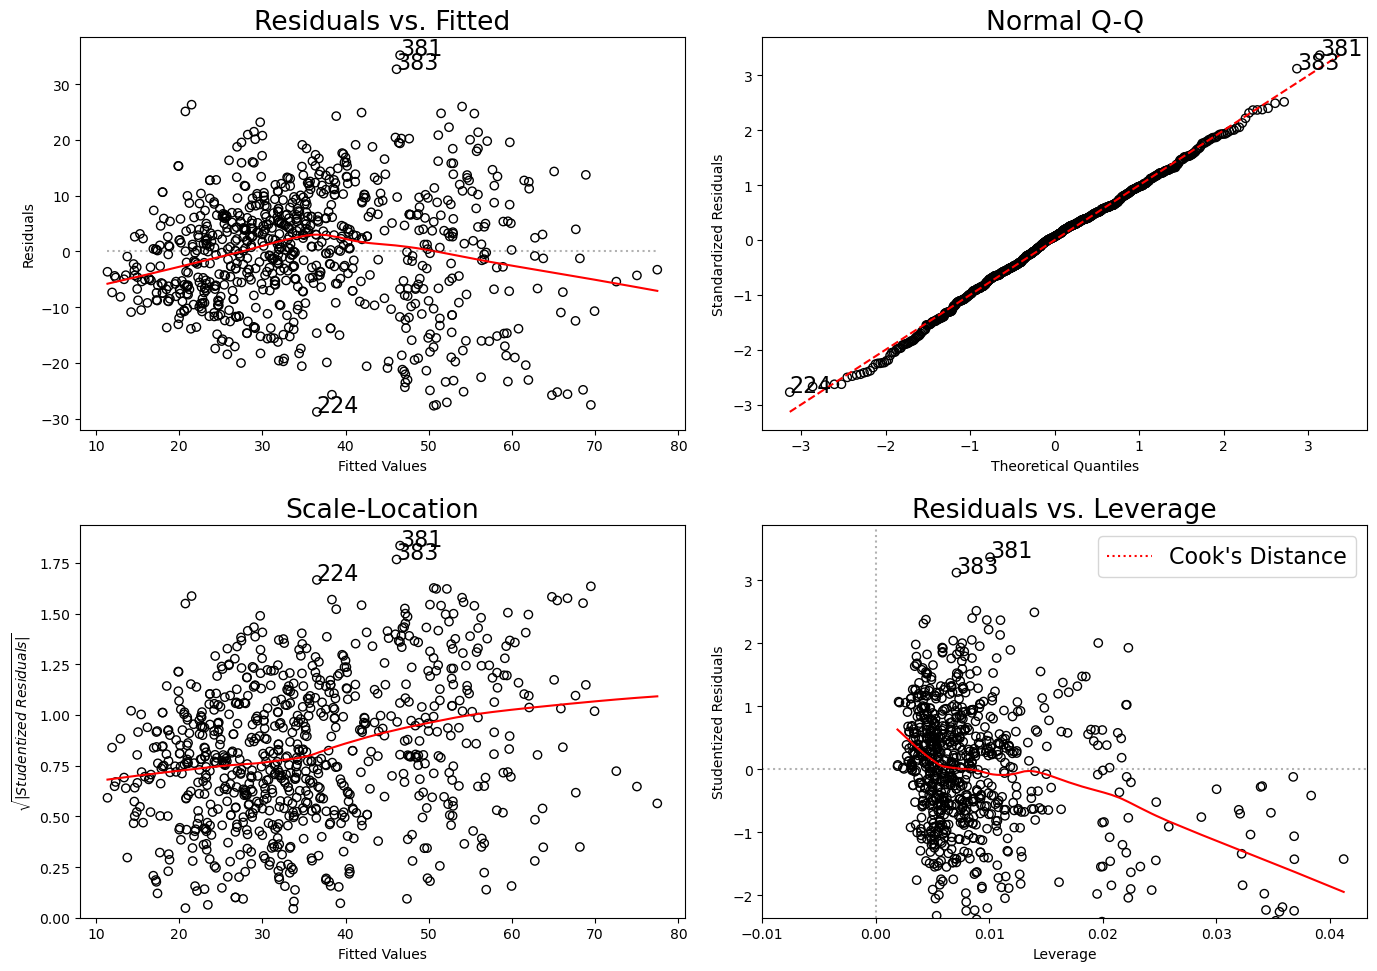

In [21]:
residual_plots(model_all)

In [22]:
# Error metrics
# calculate these metrics by hand!
from sklearn import metrics

print('MAE Train:', metrics.mean_absolute_error(y_train, model_all.fittedvalues))
print('MSE Train:', metrics.mean_squared_error(y_train, model_all.fittedvalues))
print('RMSE Train:', np.sqrt(metrics.mean_squared_error(y_train, model_all.fittedvalues)))

MAE Train: 8.314622391121404
MSE Train: 109.3812519879106
RMSE Train: 10.458549229597315
